## Notebook Imports and Packages

In [71]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #colormap

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mser

%matplotlib inline

## Example 1 - A simple cost function

## $f(x) = x^2 + x + 1$ 

In [72]:
def f(x):
    return x**2 + x + 1

In [73]:
# Make Data
x1 = np.linspace(start=-3, stop=3, num=500) # gives an array from range of values


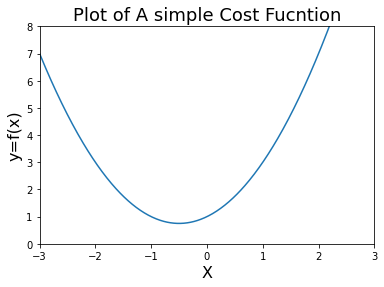

In [74]:
# Plot
plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.plot(x1, f(x1))

plt.title('Plot of A simple Cost Fucntion', fontsize = 18)
plt.xlabel('X', fontsize = 16)
plt.ylabel('y=f(x)',fontsize = 16)
plt.show()


## Slope and Derivatives

Challenge: Crerate a Python function for the dervative of $f(x)$ and $df(x)$

In [75]:
def df(x):
    return 2*x + 1

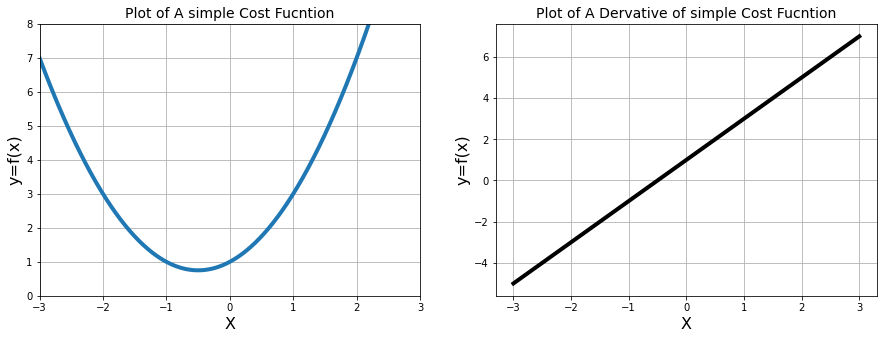

In [76]:
# Plot function and dervative 
plt.figure(figsize=[15, 5]) #measured in inches

# Chart: Cost fucntion
plt.subplot(1, 2, 1) # row = 1, column = 2 and index =1
plt.grid()

plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.plot(x1, f(x1), linewidth = 4)

plt.title('Plot of A simple Cost Fucntion', fontsize = 14)
plt.xlabel('X', fontsize = 16)
plt.ylabel('y=f(x)',fontsize = 16)

# Chart 2: Dervative of cost function
plt.subplot(1, 2, 2) # row = 1, column = 2 and index =2
plt.plot(x1, df(x1), color='black', linewidth = 4)
plt.grid()

plt.title('Plot of A Dervative of simple Cost Fucntion', fontsize = 14) # slope
plt.xlabel('X', fontsize = 16)
plt.ylabel('y=f(x)',fontsize = 16)


plt.show()


## Gradient Descent

In [77]:
# Gradient Descent

new_x = -3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001 # epsilon

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient # method
    
    step_size = abs(new_x - previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        break
    
    
print('Local minimum occurs at:', new_x)
print('slope or df(x) value at this point is: ',df(new_x))
print('f(x) value or cost at this point is:', f(new_x))
    
    

Local minimum occurs at: -0.5003323069989462
slope or df(x) value at this point is:  -0.0006646139978923049
f(x) value or cost at this point is: 0.7500001104279416


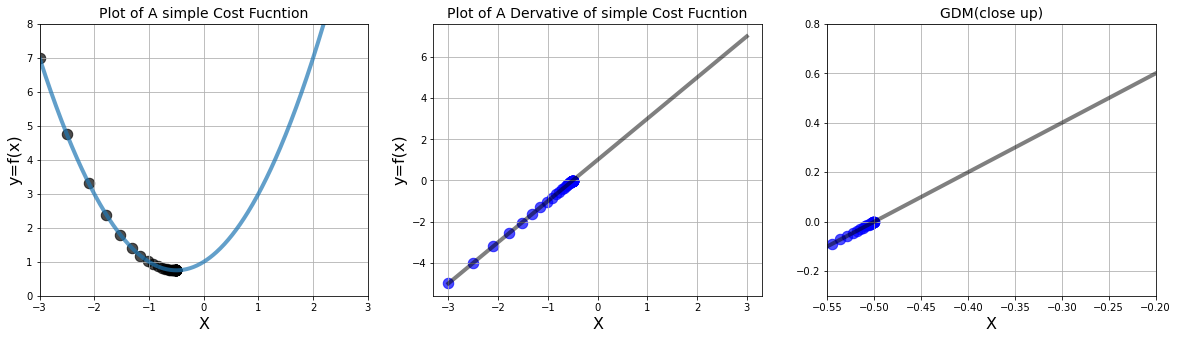

In [78]:
# superimpose the Gradient Descent calculations on plot

plt.figure(figsize=[20, 5]) #measured in inches
# Chart: Cost fucntion
plt.subplot(1, 3, 1) # row = 1, column = 2 and index =1
plt.grid()

plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.plot(x1, f(x1), linewidth = 4,alpha = 0.7)

plt.title('Plot of A simple Cost Fucntion', fontsize = 14)
plt.xlabel('X', fontsize = 16)
plt.ylabel('y=f(x)',fontsize = 16)

values = np.array(x_list)

plt.scatter(x_list, f(values), color='black', s=110, alpha = 0.7)

# Chart 2: Dervative of cost function
plt.subplot(1, 3, 2) # row = 1, column = 2 and index =2
plt.plot(x1, df(x1), color='black', linewidth = 4, alpha=0.5)
plt.grid()

plt.title('Plot of A Dervative of simple Cost Fucntion', fontsize = 14) # slope
plt.xlabel('X', fontsize = 16)
plt.ylabel('y=f(x)',fontsize = 16)


plt.scatter(x_list, slope_list, color='blue', s=110, alpha = 0.7)

# Chart 2: Dervative of cost function(colse up)
plt.subplot(1, 3, 3) # row = 1, column = 2 and index =2
plt.plot(x1, df(x1), color='black', linewidth = 4, alpha=0.5)
plt.grid()

plt.title('GDM(close up)', fontsize = 14) # slope
plt.xlabel('X', fontsize = 16)
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)


plt.scatter(x_list, slope_list, color='blue', s=110, alpha = 0.7)
plt.show()

## Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

### $$g(x) = X^4 -4x^2 + 5$$

In [79]:
# Make some Data
x_2 = np.linspace(-2,2,1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

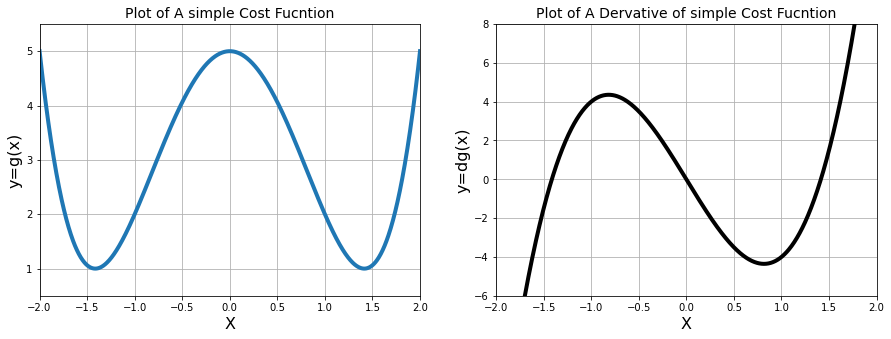

In [80]:
# Plot function and dervative 
plt.figure(figsize=[15, 5]) #measured in inches

# Chart: Cost fucntion
plt.subplot(1, 2, 1) # row = 1, column = 2 and index =1
plt.grid()

plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])
plt.plot(x_2, g(x_2), linewidth = 4)

plt.title('Plot of A simple Cost Fucntion', fontsize = 14)
plt.xlabel('X', fontsize = 16)
plt.ylabel('y=g(x)',fontsize = 16)

# Chart 2: Dervative of cost function
plt.subplot(1, 2, 2) # row = 1, column = 2 and index =2
plt.plot(x_2, dg(x_2), color='black', linewidth = 4)
plt.grid()

plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.title('Plot of A Dervative of simple Cost Fucntion', fontsize = 14) # slope
plt.xlabel('X', fontsize = 16)
plt.ylabel('y=dg(x)',fontsize = 16)


plt.show()


### Gradient Descent as a python Function

In [81]:
# Gradient Descent

def gradient_descent(derivative_func, inital_guess, multiplier=0.02, precision=0.001,
                    max_iter = 300):
    """Gradient Descent Fucntion which gives us the cost function"""

    new_x = inital_guess 

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x

        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient # method

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    

    return new_x, x_list, slope_list
    

In [82]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, inital_guess=-0.1 )# simply pointing the dg(x)
print('Local minimum occurs at:', local_min)
print('Number of steps:', len(list_x))


Local minimum occurs at: -1.4120887490901561
Number of steps: 34


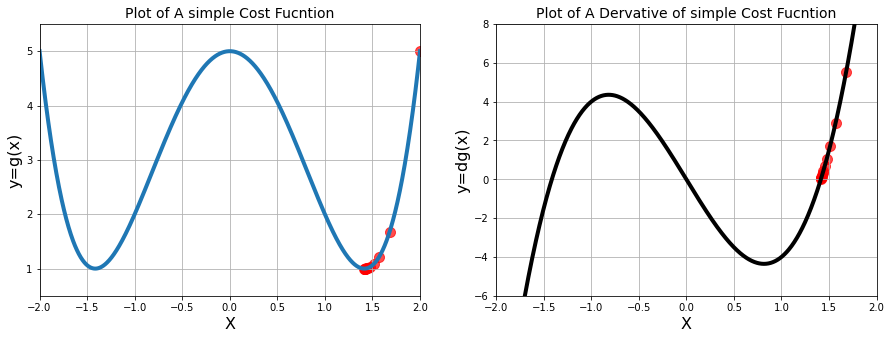

In [83]:
#calling gradient descent function

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 inital_guess=2 )# simply pointing the dg(x)
plt.figure(figsize=[15, 5]) #measured in inches

# Chart: Cost fucntion
plt.subplot(1, 2, 1) # row = 1, column = 2 and index =1
plt.grid()

plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])
plt.plot(x_2, g(x_2), linewidth = 4)

plt.title('Plot of A simple Cost Fucntion', fontsize = 14)
plt.xlabel('X', fontsize = 16)
plt.ylabel('y=g(x)',fontsize = 16)
plt.scatter(list_x, g(np.array(list_x)), color = 'red', s =100, alpha = 0.7)

# Chart 2: Dervative of cost function
plt.subplot(1, 2, 2) # row = 1, column = 2 and index =2
plt.plot(x_2, dg(x_2), color='black', linewidth = 4)
plt.grid()

plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.title('Plot of A Dervative of simple Cost Fucntion', fontsize = 14) # slope
plt.xlabel('X', fontsize = 16)
plt.ylabel('y=dg(x)',fontsize = 16)
plt.scatter(list_x, deriv_list, color = 'red', s =100, alpha = 0.7)


plt.show()


## Example 3 - Divergence, Overflow

## $$h(x) = x^5 -2x^4 + 2$$

In [84]:
# Make Data 
x_3 = np.linspace(start = -2.5, stop = 2.5, num =1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

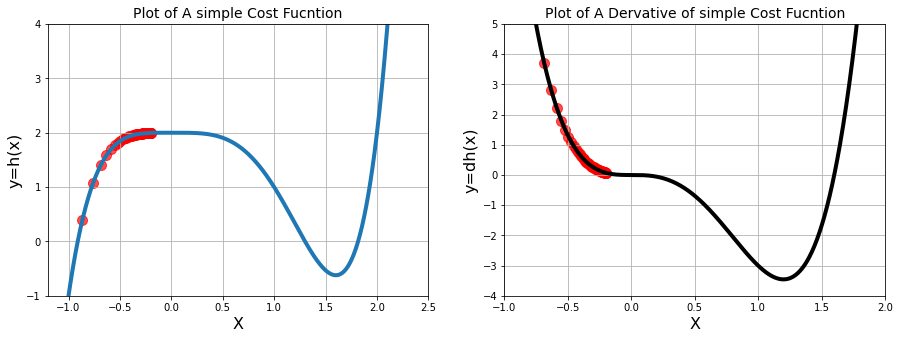

local min occurs at: -2071072.4470816324
cost at this minimum is: -3.810455326061589e+31
number of steps:  71


In [85]:
#calling gradient descent function

local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, 
                                                 inital_guess=-0.2,max_iter = 70 )# simply pointing the dg(x)
plt.figure(figsize=[15, 5]) #measured in inches

# Chart: Cost fucntion
plt.subplot(1, 2, 1) # row = 1, column = 2 and index =1
plt.grid()

plt.xlim([-1.2, 2.5])
plt.ylim([-1, 4])
plt.plot(x_3, h(x_3), linewidth = 4)

plt.title('Plot of A simple Cost Fucntion', fontsize = 14)
plt.xlabel('X', fontsize = 16)
plt.ylabel('y=h(x)',fontsize = 16)
plt.scatter(list_x, h(np.array(list_x)), color = 'red', s =100, alpha = 0.7)

# Chart 2: Dervative of cost function
plt.subplot(1, 2, 2) # row = 1, column = 2 and index =2
plt.plot(x_3, dh(x_3), color='black', linewidth = 4)
plt.grid()

plt.xlim(-1, 2)
plt.ylim(-4, 5)
plt.title('Plot of A Dervative of simple Cost Fucntion', fontsize = 14) # slope
plt.xlabel('X', fontsize = 16)
plt.ylabel('y=dh(x)',fontsize = 16)
plt.scatter(list_x, deriv_list, color = 'red', s =100, alpha = 0.7)


plt.show()
print('local min occurs at:', local_min)
print('cost at this minimum is:',h(local_min))
print('number of steps: ',len(list_x))

In [86]:
import sys
#help(sys)
# sys.version
sys.float_info.max

1.7976931348623157e+308

# Tupels

In [87]:
breakfast = 'bacon','eggs','avacado'
unlucky_numbers = 13,4,9,26,17

print('I love',breakfast[0])
print('My hotel has no'+ str(unlucky_numbers[1]) +'the floor')

I love bacon
My hotel has no4the floor


In [88]:
data_tuple = gradient_descent(derivative_func = dh, inital_guess = 0.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))

Local min is 1.5989534547394717
Cost at the last x value is -0.6214287992331258


## The Learning Rate

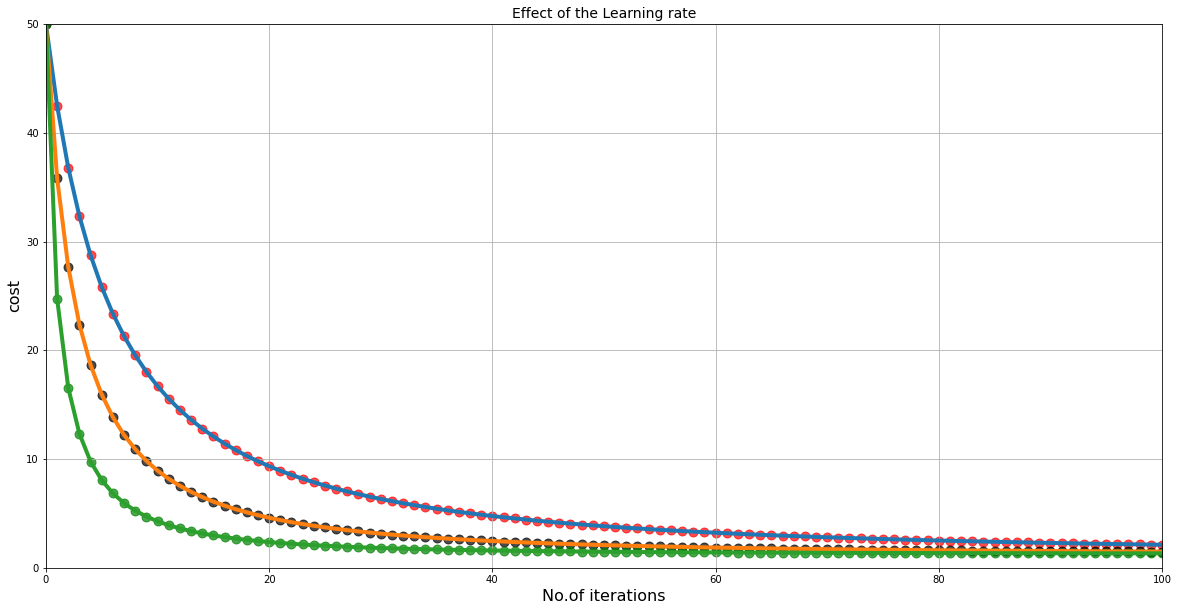

In [89]:
 #Runa gradient descent 3 times
n =100
low_gamma = gradient_descent(derivative_func=dh, inital_guess=3, precision=0.0001, 
                               multiplier=0.0005, max_iter=n )# simply pointing the dg(x)

mid_gamma = gradient_descent(derivative_func=dh, inital_guess=3, precision=0.0001, 
                               multiplier=0.001, max_iter=n )# simply pointing the dg(x)

high_gamma = gradient_descent(derivative_func=dh, inital_guess=3, precision=0.0001, 
                               multiplier=0.002, max_iter=n )# simply pointing the dg(x)


plt.figure(figsize=[20, 5+5]) #measured in inches

# Chart: Cost fucntion
plt.grid()

plt.xlim(0, n)
plt.ylim(0, 50)


plt.title('Effect of the Learning rate', fontsize = 14)
plt.xlabel('No.of iterations', fontsize = 16)
plt.ylabel('cost',fontsize = 16)

# values for our charts
# Y Axis Data: Convert the lists to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
#higher_values = np.array(higher_gamma[1])

# X axis data create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), linewidth = 4)
plt.scatter(iteration_list, g(low_values), color = 'red', s =80, alpha = 0.7)

# Plotting mid learning rate
plt.plot(iteration_list, g(mid_values), linewidth = 4)
plt.scatter(iteration_list, g(mid_values), color = 'black', s =80, alpha = 0.7)

#Plot High Learning rate
plt.plot(iteration_list, g(high_values), linewidth = 4)
plt.scatter(iteration_list, g(high_values), color = 'green', s =80, alpha = 0.7)


plt.show()

## Example 4 - Data Viz with 3D charts

### Minimise $$f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1}$$



In [90]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1/ (r+1)

In [91]:
# Make Our X and y data

x4 = np.linspace(start = -2, stop=2, num = 200)
y4 = np.linspace(start = -2, stop=2, num = 200)

print('Shape of X array', x4.shape)

x4, y4 = np.meshgrid(x4, y4) # return coordinate matrix from coordinate vector
print('Array after meshgrid: ',x4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


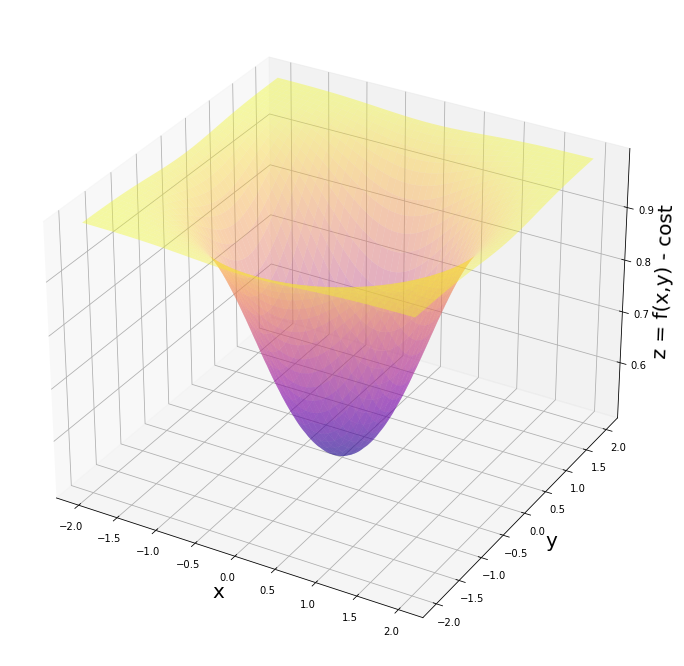

In [92]:
# Generating 3D plot 

fig = plt.figure(figsize = [16, 12])
ax = fig.gca(projection = '3d') #get current axis (gca)

ax.set_xlabel('x', fontsize = 20)
ax.set_ylabel('y', fontsize = 20)
ax.set_zlabel('z = f(x,y) - cost', fontsize = 20)

ax.plot_surface(x4, y4, f(x4, y4), cmap = cm.plasma, alpha = 0.4)
plt.show()

## Partial Derivatives and Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac {2x \ln(3) \cdot 3^{-x^2 - y^2}} {\left( 3^{-x^2 - y^2} +1 \right) ^2}$$

## $$\frac{\partial f}{\partial y} = \frac {2y \ln(3) \cdot 3^{-x^2 - y^2}} {\left( 3^{-x^2 - y^2} +1 \right) ^2}$$

In [93]:
a, b = symbols('x, y')
print('Our cost function f(x,y) is: ',f(a,b) )
print('Partial derivative wrt x is: ',diff(f(a,b), a))

print('Value of f(x,y) at x =1.8 y = 1.0 is:',
      f(a,b).evalf(subs={a:1.8, b:1.0}))
print('value of partial derivative:',
      diff(f(a,b),a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x,y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x =1.8 y = 1.0 is: 0.990604794032582
value of partial derivative: 0.0368089716197505


## Batch Gradient with Sympy

In [94]:
# setup 

multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess


for n in range(max_iter):
    
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]}) # cost
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results 
print('Values in graadient array', gradients)
print('Minimum occurs of x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is: ',f(params[0], params[1]))

Values in graadient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs of x value of: 3.45838599885832e-11
Minimum occurs at y value of: 1.92132555492129e-11
The cost is:  0.500000000000000


In [95]:
# partial derivative function:

def fpx(x,y):
    r = 3**(-x**2 - y**2)
    return 2*r*x*log(3)/(r+ 1)**2

def fpy(x,y):
    r = 3**(-x**2 - y**2)
    return 2*r*y*log(3)/(r+ 1)**2

In [96]:
# setup 

multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess


for n in range(max_iter):
    
    gradient_x = fpx(params[0], params[1])# cost
    gradient_y = fpy(params[0], params[1]) 
    
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results 
print('Values in graadient array', gradients)
print('Minimum occurs of x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is: ',f(params[0], params[1]))

Values in graadient array [2.01013038e-11 1.11673910e-11]
Minimum occurs of x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is:  0.5


### Graphing 3D Gradient Descent & Adv Numpy Arrays

In [97]:
# Numpy Array Practice:
kirk = np.array([['captain','Guitar']])
hs_band = np.array([['Black Thought','NC'],['QuestLove','Drums']])

print('hs_band[0][1]: ',hs_band[1][0])

the_root = np.append(arr=hs_band, values = kirk, axis = 0 )
print(the_root)

print('Printing nicknames...',the_root[:, 0])
the_root = np.append(arr = the_root, values =[['Malik B', 'MC']], axis =0)
print('printing bandroles...',the_root[:,1])

hs_band[0][1]:  QuestLove
[['Black Thought' 'NC']
 ['QuestLove' 'Drums']
 ['captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'QuestLove' 'captain']
printing bandroles... ['NC' 'Drums' 'Guitar' 'MC']


In [98]:
# setup 

multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)


for n in range(max_iter):
    
    gradient_x = fpx(params[0], params[1])# cost
    gradient_y = fpy(params[0], params[1]) 
    
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
    values_array = np.append(arr=values_array, values=params.reshape(1,2),
                            axis = 0)
    
    
# Results 
print('Values in graadient array', gradients)
print('Minimum occurs of x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is: ',f(params[0], params[1]))

(1, 2)
Values in graadient array [2.01013038e-11 1.11673910e-11]
Minimum occurs of x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is:  0.5


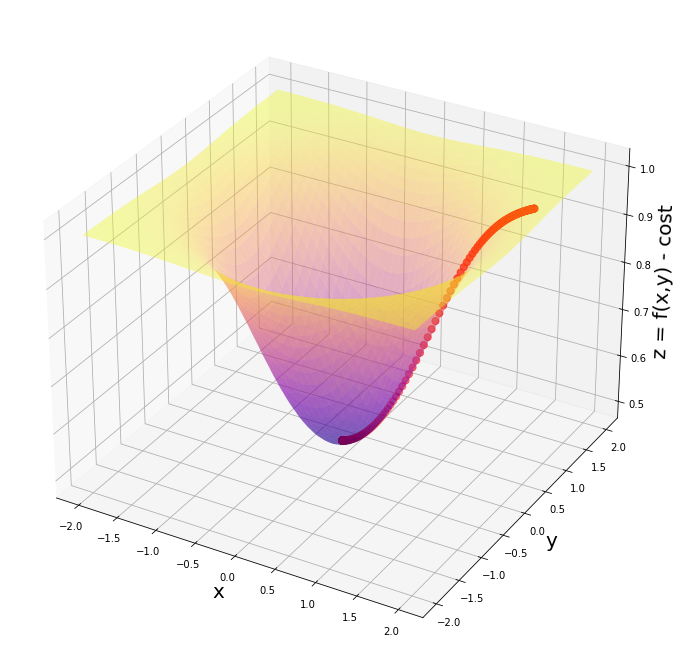

In [99]:
fig = plt.figure(figsize = [16, 12])
ax = fig.gca(projection = '3d') #get current axis (gca)

ax.set_xlabel('x', fontsize = 20)
ax.set_ylabel('y', fontsize = 20)
ax.set_zlabel('z = f(x,y) - cost', fontsize = 20)

ax.plot_surface(x4, y4, f(x4, y4), cmap = cm.plasma, alpha = 0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], 
           f(values_array[:, 0], values_array[:, 1]), s=50, color = 'red')
plt.show()

## Working with Data and Real Cost Fucntion

### Mean Squared Error: a cost Function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}\big)^2 $$

### $$MSE =\frac {1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}\big)^2 $$

### $$MSE =\frac {1}{n} \sum_{i=1}^{n} \big( y - \hat {y} \big)^2 $$

In [100]:
# Make Sample Data
x5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose() # 1D to 2D Array
y5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)

# quick Linear Regression
regr = LinearRegression()
regr.fit(x5, y5)

print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


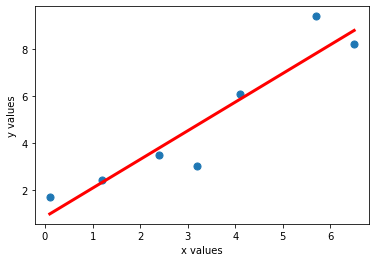

In [101]:
plt.scatter(x5, y5, s=50)
plt.plot(x5, regr.predict(x5), color='red', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [102]:
# y_cap = theta0 + theta1*x

y_cap = 0.8475351486029536 + 1.2227264637835915*x5
print('Estimated values y_cap are: \n', y_cap)
print('Incomparison, the actual y values are \n', y5)

Estimated values y_cap are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Incomparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


### MSE Function

In [103]:
def mse(y, y_hat):
    n = y.size
    MSE = sum((y - y_hat)**2)
#     for i in range(n):
#         s = (y - y_hat)**2
#         MSE += s
# or np.average((y-y_hat)**2, axis=0)
    f_mse = MSE *(1/ n)
    return f_mse

In [104]:
mse(y5, y_cap)

array([0.94796558])

In [105]:
print('Manually calculated MSE is:', mse(y5, y_cap))
print('MSE regression using  manul is: ', mser(y5, y_cap))
print(mser(y5, regr.predict(x5)))

Manually calculated MSE is: [0.94796558]
MSE regression using  manul is:  0.9479655759794577
0.9479655759794577


## 3D Plot for the MSE cost Function

### Make Data for thetas

In [106]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1) # 2D array



## Calc MSE

In [107]:
plot_cost = np.zeros((nr_thetas, nr_thetas)) # 2D array of zeroes
# Nested Loop
for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[i][j])
        y_cap = plot_t0[i][j] + plot_t1[i][j] * x5
        plot_cost[i][j] = mse(y5, y_cap)
print('Shape of plot_t0', plot_t0.shape)    
print(f'Shape of plot_t1 {plot_t1.shape}')    
print('Shape of plot_cost', plot_cost.shape)    

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


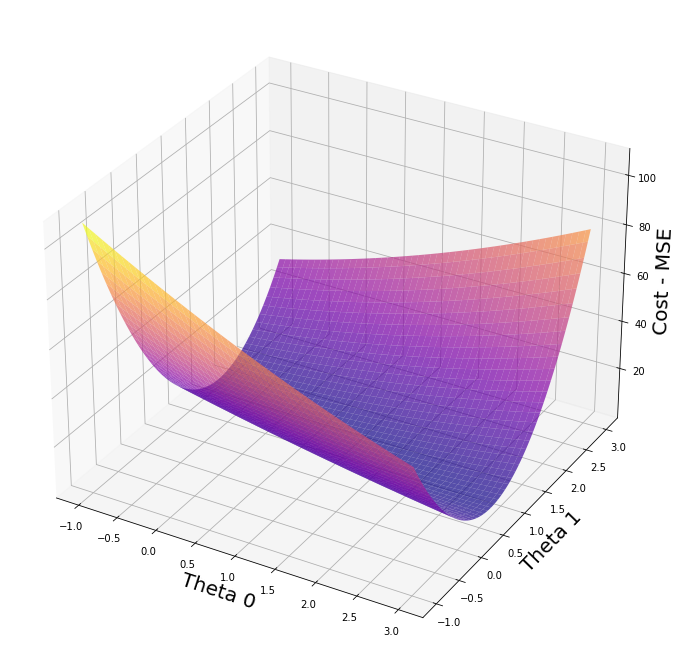

In [137]:
# Plotting MSE

fig = plt.figure(figsize = [16,12])
ax = fig.gca(projection= '3d')

ax.set_xlabel('Theta 0', fontsize =20)
ax.set_ylabel('Theta 1', fontsize =20)
ax.set_zlabel('Cost - MSE', fontsize =20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap = cm.plasma, alpha = 0.7)

plt.show()

In [109]:
print('Min value of plot_cost', plot_cost.min()) 
# Data points won't effect the cost theta1 and theta2 effects the cost.

Min value of plot_cost 0.9483826526747163


In [110]:
ij_min = np.unravel_index(indices = plot_cost.argmin(), shape = plot_cost.shape)
print('Min occurs at (i,j): ', ij_min)

print('Min MSE for theta 0 at plot_to[111][91]', plot_t0[111][91])
print('Min MSE for theta 1 at plot_t1[111][91]', plot_t1[111][91])

Min occurs at (i,j):  (111, 91)
Min MSE for theta 0 at plot_to[111][91] 0.829145728643216
Min MSE for theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t $\theta_0$ and $\theta_1$

### $$\frac{\partial MSE}{\partial\theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i) \big)}$$

### $$\frac{\partial MSE}{\partial\theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big (x^{(i)} \big)$$

## MSE & Gradien Descent

In [111]:
# x values y values array of theta parameters (theta 0 at index 0 and theta1 at index 1)

def grad(x, y, thetas):
    n = y.size
    
    theta0_slope = (-2/n) * sum(y- theta[0]- theta[1] * x)
    
    theta1_slope = (-2/n) * sum((y- theta[0]- theta[1] * x) *x)
    
    return np.array([theta0_slope[0], theta1_slope[0]])
    # return np.append(arr = theta0_slope values=theta1_slope)

In [139]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# collect data points for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y5, thetas[0] + thetas[1]* x5)

for i in range(500):
    thetas = thetas - multiplier * grad(x5, y5, thetas)
    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr = mse_vals, values = mse(y5, thetas[0] + thetas[1]* x5))
# Results

print('Min occurs at theta 0: ',thetas[0])
print('Min occurs at theta 1: ',thetas[1])
print('MSE is: ',mse(y5, thetas[0]+thetas[1]*x5))

Min occurs at theta 0:  -73.21428571428584
Min occurs at theta 1:  -326.2999999999971
MSE is:  [1836639.72853058]


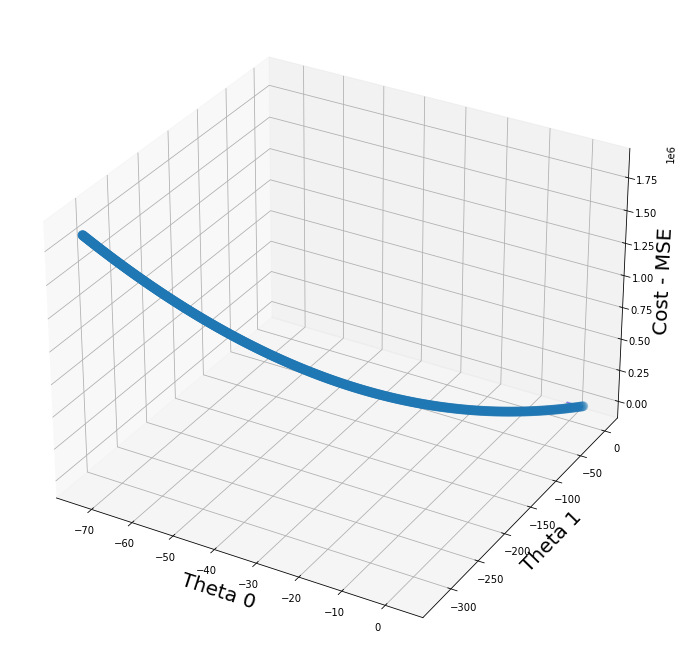

In [142]:
fig = plt.figure(figsize = [16,12])
ax = fig.gca(projection= '3d')

ax.set_xlabel('Theta 0', fontsize =20)
ax.set_ylabel('Theta 1', fontsize =20)
ax.set_zlabel('Cost - MSE', fontsize =20)
#ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80)
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap = cm.rainbow, alpha = 0.7)
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80)
plt.show()